In [89]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

2024-02-06 11:44:11.861068: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Load data

In [5]:
data = np.loadtxt('/Users/arina/study/ds/coursera/ml_specialization/machine_learning_specialization/code/machine_learning_specialization/utils/model_selection_data/data_w3_ex1.csv', delimiter=',')

In [6]:
data

array([[1651.        ,  432.64521724],
       [1691.81632653,  454.93552962],
       [1732.63265306,  471.52524758],
       [1773.44897959,  482.50638875],
       [1814.26530612,  468.35788634],
       [1855.08163265,  482.15253068],
       [1895.89795918,  540.02175551],
       [1936.71428571,  534.58426716],
       [1977.53061224,  558.34620761],
       [2018.34693878,  566.42344476],
       [2059.16326531,  581.39765115],
       [2099.97959184,  596.45873727],
       [2140.79591837,  596.71483169],
       [2181.6122449 ,  619.45139015],
       [2222.42857143,  616.57626499],
       [2263.24489796,  653.16245988],
       [2304.06122449,  666.5199211 ],
       [2344.87755102,  670.58975936],
       [2385.69387755,  669.0228872 ],
       [2426.51020408,  678.90932305],
       [2467.32653061,  707.43696439],
       [2508.14285714,  710.76028811],
       [2548.95918367,  745.19134109],
       [2589.7755102 ,  729.84576182],
       [2630.59183673,  743.8029216 ],
       [2671.40816327,  7

In [18]:
X, y = np.expand_dims(data[:, 0], axis=1), np.expand_dims(data[:, 1], axis=1)
print(f'{X.shape = }, {y.shape = }')

X.shape = (50, 1), y.shape = (50, 1)


Split data: train, cross-validation, test sets

In [19]:
X_train, X_, y_train, y_ = train_test_split(X, y, train_size=.6, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=.2, random_state=1)

print(f'{X_train.shape = }, {X_cv.shape = }, {X_test.shape = }')

X_train.shape = (30, 1), X_cv.shape = (16, 1), X_test.shape = (4, 1)


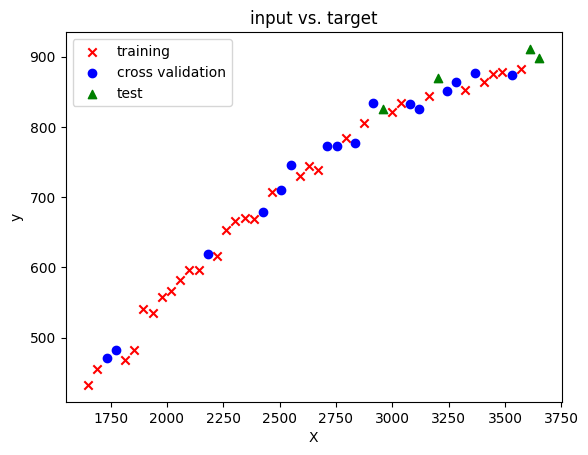

In [22]:
plt.scatter(X_train, y_train, marker='x', c='r', label='training')
plt.scatter(X_cv, y_cv, marker='o', c='b', label='cross validation')
plt.scatter(X_test, y_test, marker='^', c='g', label='test')

plt.title("input vs. target")

plt.xlabel("X")
plt.ylabel("y")

plt.legend()

plt.show()

Feature scaling

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print(f'{X_train_scaled.min() = }, {X_train_scaled.max() = }')

X_train_scaled.min() = -1.4839623598818932, X_train_scaled.max() = 1.8531778752592067


In [31]:
X_cv_scaled = scaler.transform(X_cv)
X_test_scaled = scaler.transform(X_test)

Linear model

In [37]:
linear_model = LinearRegression()
linear_model.fit(X=X_train_scaled, y=y_train)
y_hat = linear_model.predict(X_train_scaled)

MSE for training set

In [38]:
print(f'Train set: {mean_squared_error(y_pred=y_hat, y_true=y_train) = }')

Train set: mean_squared_error(y_pred=y_hat, y_true=y_train) = 812.3874838506631


MSE for cv set

In [39]:
y_hat = linear_model.predict(X_cv_scaled)
print(f'CV set: {mean_squared_error(y_pred=y_hat, y_true=y_cv) = }')

CV set: mean_squared_error(y_pred=y_hat, y_true=y_cv) = 892.9268049881327


Adding polynomial features

In [50]:
train_mses = []
cv_mses = []
models = []
scalers = []
polynomials = []

for i in range(1, 11):
    poly = PolynomialFeatures(i, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_cv_poly = poly.transform(X_cv)
    polynomials.append(poly)
    
    poly_scaler = StandardScaler()
    X_train_poly_scaled = poly_scaler.fit_transform(X_train_poly)
    X_cv_poly_scaled = poly_scaler.transform(X_cv_poly)
    scalers.append(poly_scaler)

    model = LinearRegression()
    model.fit(X_train_poly_scaled, y_train)
    models.append(model)

    train_mses.append(mean_squared_error(y_train, model.predict(X_train_poly_scaled)))
    cv_mses.append(mean_squared_error(model.predict(X_cv_poly_scaled), y_cv))



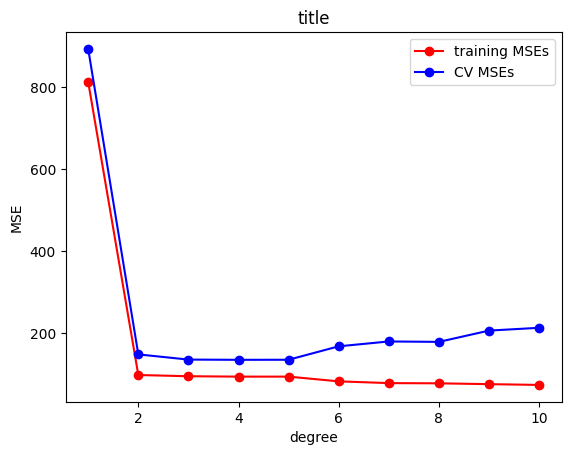

In [51]:
degrees = range(1, 11)
plt.plot(degrees, train_mses, marker='o', c='r', label='training MSEs'); 
plt.plot(degrees, cv_mses, marker='o', c='b', label='CV MSEs'); 
plt.title("title")
plt.xlabel("degree"); 
plt.ylabel("MSE"); 
plt.legend()
plt.show()

In [56]:
index_best_fit = np.argmin(cv_mses)
print(f'degree_best_fit = {index_best_fit + 1}')

degree_best_fit = 4


Test the model

In [72]:
X_test_poly = polynomials[index_best_fit].transform(X_test)
X_test_poly_scaled = scalers[index_best_fit].transform(X_test_poly)
y_hat = models[index_best_fit].predict(X_test_poly_scaled)

print(f'Test error: {mean_squared_error(y_hat, y_test)}')
print(f'CV error: {cv_mses[index_best_fit]}')
print(f'Train error: {train_mses[index_best_fit]}')


Test error: 388.4568271880531
CV error: 135.42826406979609
Train error: 94.28514905260148


NN

Classification


In [91]:
def build_models():
    
    tf.random.set_seed(20)
    
    model_1 = Sequential(
        [
            Dense(25, activation = 'relu'),
            Dense(15, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_1'
    )

    model_2 = Sequential(
        [
            Dense(20, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(20, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_2'
    )

    model_3 = Sequential(
        [
            Dense(32, activation = 'relu'),
            Dense(16, activation = 'relu'),
            Dense(8, activation = 'relu'),
            Dense(4, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_3'
    )
    
    model_list = [model_1, model_2, model_3]
    
    return model_list

In [80]:
data = np.loadtxt('/Users/arina/study/ds/coursera/ml_specialization/machine_learning_specialization/code/machine_learning_specialization/utils/model_selection_data/data_w3_ex2.csv', delimiter=',')
X, y = data[:, :2].reshape(-1, 2), data[:, 2].reshape(-1, 1)
X.shape, y.shape

((200, 2), (200, 1))

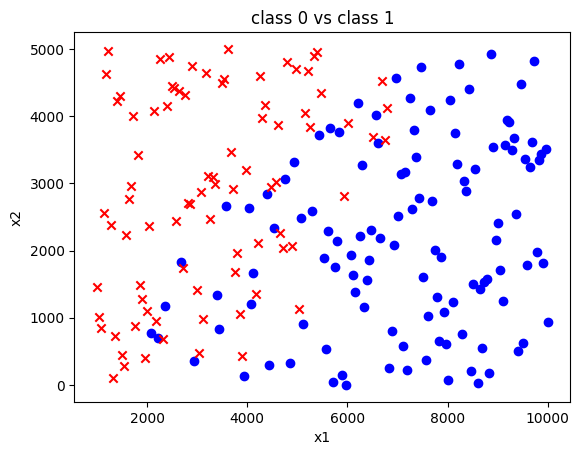

In [88]:
for i in range(len(y)):
    color = 'r' if y[i] == 0 else 'b'
    marker = 'x' if y[i] == 0 else 'o'
    plt.scatter(X[i, 0], X[i, 1], c=color, marker=marker)
plt.title("class 0 vs class 1")
plt.xlabel("x1"); 
plt.ylabel("x2"); 
plt.show()

Split data

In [93]:
X_train, X_, y_train, y_ = train_test_split(X, y, train_size=0.6, random_state=1)
X_test, X_cv, y_test, y_cv = train_test_split(X_, y_, train_size=0.5, random_state=1)

In [96]:
X_train.max(), X_train.min()

(9909.547738693467, 50.25125628140704)

In [100]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
X_test_scaled = scaler.transform(X_test)

X_test_scaled.max(), X_test_scaled.min()

(1.8596576083918088, -1.7037448298990965)

In [107]:
train_errors = []
cv_errors = []

models = build_models()

In [108]:
for model in models:
    model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)
        )
    model.fit(
        X_train_scaled, y_train, epochs=200
    )
    y_hat = tf.math.sigmoid(model.predict(X_train_scaled))
    y_pred = np.where(y_hat > 0.5, 1, 0)
    train_errors.append(np.mean(y_pred != y_train))

    y_cv_hat = tf.math.sigmoid(model.predict(X_cv_scaled))
    y_cv_pred = np.where(y_cv_hat > 0.5, 1, 0)
    cv_errors.append(np.mean(y_cv_pred != y_cv))

Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 0.6242
Epoch 2/200
4/4 [==============================] - 0s 8ms/step - loss: 0.4915
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4013
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3431
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3050
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2869
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2839
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2774
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2814
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2747
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2735
Epoch 12/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2730
Epoch 13/200
4/4 [==============================] - 0s 2ms/st

In [110]:
for i in range(len(models)):
    print(f"{models[i].name}" + " errors:")
    print(f"Train error: {train_errors[i]}")
    print(f"CV error: {cv_errors[i]}")
    print()

model_1 errors:
Train error: 0.075
CV error: 0.175

model_2 errors:
Train error: 0.06666666666666667
CV error: 0.175

model_3 errors:
Train error: 0.1
CV error: 0.175



Test error

In [112]:
best_model = 2

y_hat = tf.math.sigmoid(models[best_model].predict(X_test_scaled))
y_pred = np.where(y_hat > 0.5, 1, 0)
test_error = np.mean(y_hat != y_test)

print(f"Selected Model: {best_model + 1}")
print(f"Test error: {test_error}")
print(f"Train error: {train_errors[i]}")
print(f"CV error: {cv_errors[i]}")

2/2 [==============================] - 0s 5ms/step
Selected Model: 3
Test error: 0.65
Train error: 0.1
CV error: 0.175
